In [21]:
import pandas as pd
import numpy as np
import ydf

dataset = pd.read_csv('train.csv')

In [49]:
dataset['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [23]:
dataset = dataset.drop('Id', axis=1)

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>],
       [<AxesSubplot:title={'center':'Ful

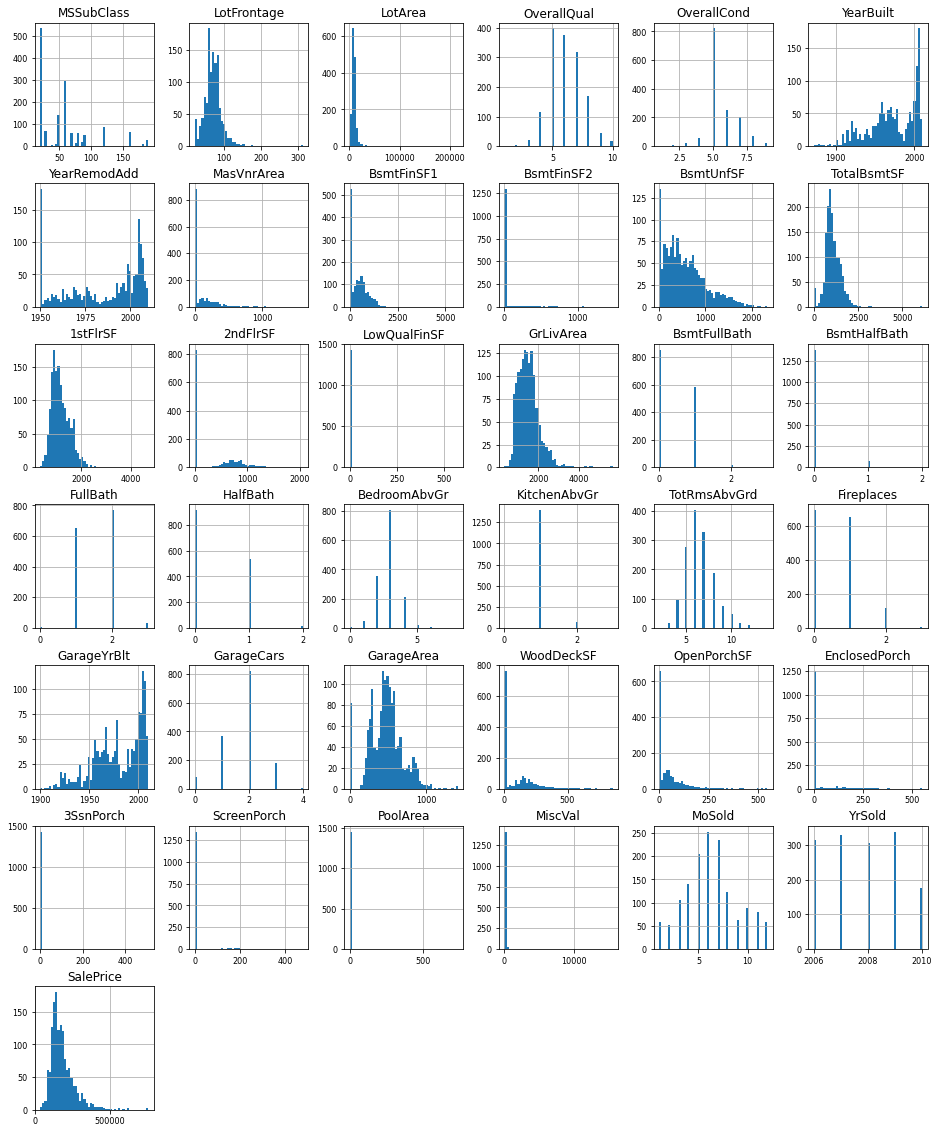

In [24]:
dataset_num = dataset.select_dtypes(include = ['float64', 'int64'])
dataset_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

# Model Creation

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

In [26]:
train, val = train_test_split(dataset, test_size=0.3)

In [45]:
model = ydf.GradientBoostedTreesLearner(label="SalePrice", task=ydf.Task.REGRESSION).train(dataset) # typically you don't use val sets for RFs

Train model on 1460 examples
Model trained in 0:00:01.766448


In [46]:
model.describe()

In [31]:
evaluation = model.evaluate(val)

In [39]:
model.analyze(val, sampling=0.1)

In [44]:
model.plot_tree

<bound method DecisionForestModel.plot_tree of <ydf.model.gradient_boosted_trees_model.gradient_boosted_trees_model.GradientBoostedTreesModel object at 0x000002E24DD06580>>

In [47]:
# getting training loss
pred = model.predict(dataset)
log_pred = np.log(pred)
log_y = np.log(dataset['SalePrice'])
mse = mean_squared_error(log_y, log_pred)
rmse = np.sqrt(mse)
r2 = r2_score(log_y, log_pred)
print('Training loss')
print('RMSE: ', rmse)
print('R2: ', r2)


Training loss
RMSE:  0.06590725761223049
R2:  0.9727582418698483


In [35]:
pred_val = model.predict(val)
log_pred = np.log(pred_val)
log_y = np.log(val['SalePrice'])
mse = mean_squared_error(log_y, log_pred)
rmse = np.sqrt(mse)
r2 = r2_score(log_y, log_pred)
print('RMSE:', rmse)
print('R2:', r2)


RMSE: 0.13043153631483534
R2: 0.8913244103422602


In [48]:
# save for submitting
test = pd.read_csv('test.csv')
results = pd.DataFrame(test['Id'], columns=['Id'])
test = test.drop('Id', axis=1)

pred_test = model.predict(test)
results['SalePrice'] = pred_test
results.to_csv('submission2.csv', index=False)